In [1]:
"""
Reading files from the given java folder path
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from math import radians, sin, cos, acos
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/nishit_dhakar/Desktop/Python/"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'L2L3.csv', 'L2L3.xlsx', 'Non SAP tickets.xlsx', 'NonSAP_Tkt.csv', 'pmi_non_sap_23_May.ipynb', 'test.csv', '~$L2L3.xlsx']


In [2]:
"""
Reading files from the given java folder path and using the encoding ISO-8859-1
"""

# Path of the file to read
pmi_file_path = 'C:/Users/nishit_dhakar/Desktop/Python/L2L3.csv'
#Read file from the csv
pmi_df = pd.read_csv(pmi_file_path ,encoding = 'ISO-8859-1')
pmi_df.shape

(44975, 18)

In [3]:
"""
Dropping of the un necessary columns. 
Finding the fields that were blank or dont have any data 
"""

pmi_df.isna().sum()
pmi_df=pmi_df.drop(['Urgency' ], axis=1)


In [4]:
pmi_df.isna().sum()

ï»¿Number                0
Short Description        0
Service                  0
Description              0
Category                 0
Impact                   0
Assignment Group         1
Close Code               5
Close Notes             20
Create Time              0
Resolve Time             0
L1                   44338
Is L1.5                  0
Other L1.5               0
IS L2                    0
Is L3                44975
DAYS                     0
dtype: int64

In [5]:
"""
Cleanup of the field name to more short and relevent name
"""

pmi_df.rename(columns={'Number':'Number',
                       'Short Description':'short_description',
                          'Service':'service',
                        'Issue id':'issueid',
                           'Description' : 'description' ,
                           'Category' : 'category' ,
                       'Impact' : 'impact' ,
                       'Priority' : 'priority' ,
                       'Assignment Group' : 'assignment_group' ,
                       'Close Code' : 'close_code' ,
                       'Close Notes' : 'close_notes' ,
                       'Create Time': 'create_time' ,
                       'Resolve Time' : 'resolve_time' ,
                       'SAP/Non-SAP' : 'applicationtype' 
                      },  
                 inplace=True)

In [6]:
pmi_df.close_code.unique()

array(['Solved (Permanently)', 'Not Solved (Unable)',
       'Solved (Workaround)', 'Not Solved (Gone)', nan,
       'Solved Remotely (Permanently)', 'Solved (By System)',
       'Solved (By User)'], dtype=object)

In [23]:
from collections import Counter
import nltk
nltk.download('punkt')

#r1 = pmi_df.short_description.values
r1 = pmi_df.close_notes.values

final_string = "";
for value in r1:
    final_string = final_string  + value + " ";


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nishit_dhakar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: can only concatenate str (not "float") to str

In [7]:
pmi_df.head()

,ï»¿Number,short_description,service,description,category,impact,assignment_group,close_code,close_notes,create_time,resolve_time,L1,Is L1.5,Other L1.5,IS L2,Is L3,DAYS
0,SRQ#52301,Typo is MoveIT job QAS email notificaiton message,Quantum Treasury Application for PMI,It seems there is a typo in the email notifica...,Request for Information,None,ISDM Connectivity Services,Solved (Permanently),Issue reported:Typo is MoveIT job QAS email no...,4/27/19 9:03,5/1/19 3:50,NaN,0,0,0,NaN,3.0
1,SRQ#103886,R27 SW_App : Flowingly- Can't Submit Third App...,Flowingly Application for PMI,Dear Team Kindly help to Can't Submit Third A...,Request for Information,None,ISDM ZZZ Collaboration Flowingly,Solved (Permanently),"Who: Handayani, Wiwin What: Can't Submit Third...",4/29/19 11:11,5/1/19 5:34,NaN,0,0,0,NaN,3.0
2,SRQ#9943,Please suspend archive backup on OCL28,PLM Analytics Application for PMI,Please suspend archive backup on OCL28,Request for Change,None,GTS TIS Backup,Solved (Permanently),Requested for: Please suspend archive backup o...,5/1/19 5:47,5/1/19 6:02,NaN,0,0,0,NaN,1.0
3,SRQ#49394,[FT] R23 SW_App : Flowingly- Slow Respond when...,Flowingly Application for PMI,Dear Team Kindly help to SW_App : Flowingly- ...,Incident,Low,ISDM ZZZ Collaboration Flowingly Project,Solved (Permanently),"Who: Tresno, Mariani Budi What: Slow Respond w...",4/23/19 11:29,5/1/19 6:16,NaN,0,0,0,NaN,7.0
4,SRQ#143570,user can not print in isms printer,iSMS Application for PMIL,user can not print in isms printer,Request for Change,None,PM Israel Service Desk,Solved (Permanently),user can not print in isms printer - i have ch...,5/1/19 7:24,5/1/19 7:24,NaN,0,0,0,NaN,1.0


In [8]:
"""
modifying the date format to more usable format
"""

pmi_df.created_date = pd.to_datetime(pmi_df.create_time)
pmi_df.resolved_date = pd.to_datetime(pmi_df.resolve_time)

pmi_df["ticketcreatehour"]=pmi_df.created_date.dt.hour
pmi_df["ticketcreatemonth"]=pmi_df.created_date.dt.month
pmi_df["ticketcreateday"]=pmi_df.created_date.dt.day
pmi_df["ticketcreateyear"]=pmi_df.created_date.dt.year
pmi_df["ticketcreateweekday"] = pmi_df.created_date.dt.weekday

pmi_df['ticket_solving_duration'] = ((pmi_df.resolved_date  - pmi_df.created_date))/np.timedelta64(1,'h')

C:\Users\nishit_dhakar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\nishit_dhakar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


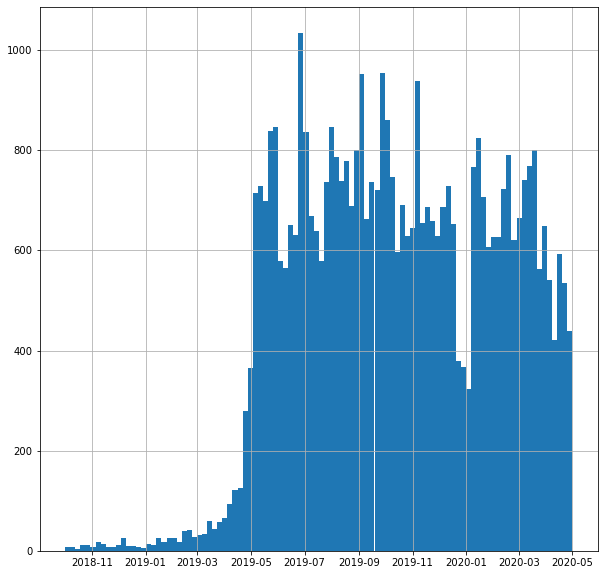

In [9]:
"""
Identifying the pattern of request generation pattern
"""
pmi_df.created_date.hist(bins=100,figsize=(10,10))

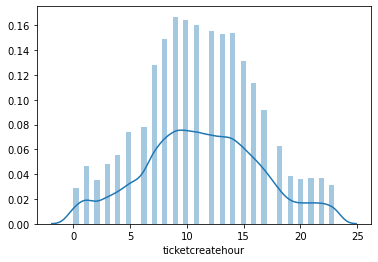

In [10]:
import seaborn as sns

sns.distplot(pmi_df.ticketcreatehour)


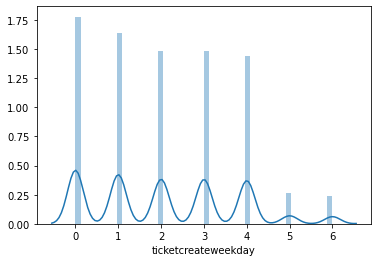

In [11]:
sns.distplot(pmi_df.ticketcreateweekday)

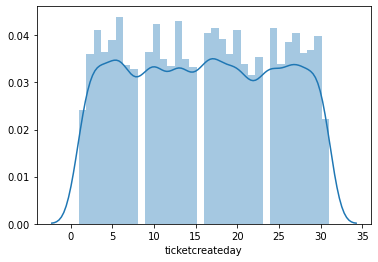

In [12]:

sns.distplot(pmi_df.ticketcreateday)

In [13]:
pmi_df.category.unique()

array(['Request for Information', 'Request for Change', 'Incident',
       'Complaint'], dtype=object)

In [14]:
pmi_df_dervived=pmi_df[pmi_df.ticket_solving_duration < 500]

pmi_boxplot_rfc=pmi_df_dervived[
            pmi_df_dervived.service.isin(['iSMS','LES/MES','OMSP','Quantum Treasury','iSMS EZD','PLM']) & 
                           pmi_df_dervived.category.isin(['Request for Change']) ]
pmi_boxplot_incident=pmi_df_dervived[
            pmi_df_dervived.service.isin(['iSMS','LES/MES','OMSP','Quantum Treasury','iSMS EZD','PLM']) & 
                           pmi_df_dervived.category.isin(['Incident']) ]
pmi_boxplot_rfi=pmi_df_dervived[
            pmi_df_dervived.service.isin(['iSMS','LES/MES','OMSP','Quantum Treasury','iSMS EZD','PLM']) & 
                           pmi_df_dervived.category.isin(['Request for Information']) ]

C:\Users\nishit_dhakar\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\nishit_dhakar\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nishit_dhakar\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


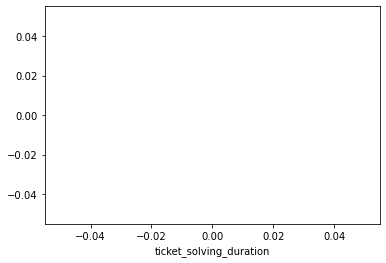

In [15]:
sns.distplot(pmi_df[pmi_df.service=='iSMS'].ticket_solving_duration)

In [16]:
#sns.set(style="whitegrid")
sns.boxplot(x=pmi_boxplot_rfc.service,y = pmi_boxplot_rfc.ticket_solving_duration,data = pmi_boxplot_rfc)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [17]:
sns.set(style="whitegrid")
sns.boxplot(x=pmi_boxplot_incident.service,y = pmi_boxplot_incident.ticket_solving_duration,data = pmi_boxplot_incident)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=pmi_boxplot_rfi.service,y = pmi_boxplot_rfi.ticket_solving_duration,data = pmi_boxplot_rfi)

In [ ]:
pmi_df.close_code.value_counts()

In [ ]:
pmi_df.groupby(['ticketcreateyear','ticketcreatemonth','close_code'])["Number"].count().to_frame("count")

In [ ]:
labels =pmi_df.category.value_counts().keys()
sizes = pmi_df.category.value_counts()
pmi_df.category.value_counts().plot(kind='pie',
                                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
pmi_df.category.value_counts()


In [ ]:
sizes= pmi_df.category.value_counts()
labels = pmi_df.category.value_counts().keys()
pmi_df.groupby(['ticketcreatemonth','category' ])["Number"].count().unstack().plot(y=['Request for Change','Incident','Request for Information', 'Complaint'],kind='bar', stacked=True,figsize=(10,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
sizes= pmi_df.category.value_counts()
labels = pmi_df.category.value_counts().keys()
pmi_df.groupby(['ticketcreatehour','category' ])["Number"].count().unstack().plot(y=['Request for Change','Incident','Request for Information', 'Complaint'],kind='bar', stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
size= pmi_df.ticketcreatehour.value_counts()
labels = pmi_df.ticketcreatehour.value_counts().keys()

pmi_df.ticketcreatehour.value_counts().plot(kind='pie',
                                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
seriesObj1 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 3 and x['ticketcreatehour']  < 12) else False , axis=1)
 
# Count number of True in series
numOfRows1 = len(seriesObj1[seriesObj1 == True].index)
 
print('Ticket count created at 3 CET and less than 12 CET  : ', numOfRows1)
#10286

seriesObj2 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 10 and x['ticketcreatehour']  < 19) else False , axis=1)
 
# Count number of True in series
numOfRows2 = len(seriesObj2[seriesObj2 == True].index)
 
print('Ticket count created at 10 CET and less than 19 CET  : ', numOfRows2)

seriesObj3 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 19 and x['ticketcreatehour']  < 24) else False , axis=1)
 
# Count number of True in series
numOfRows3 = len(seriesObj3[seriesObj3 == True].index)
 
print('Ticket count created at 19 CET and less than 24 CET  : : ', numOfRows3)

seriesObj4 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 1 and x['ticketcreatehour']  < 3) else False , axis=1)
 
# Count number of True in series
numOfRows4 = len(seriesObj4[seriesObj4 == True].index)
 
print('Ticket count created at 24 CET and less than 3 CET  : : ', numOfRows4)

sum1 = numOfRows1+ numOfRows2 + numOfRows3 + numOfRows4
print("total " , sum1)


In [ ]:
df = pd.DataFrame({
                   'radius': [numOfRows1, numOfRows2 , numOfRows3 + numOfRows4]},
                   index=['3 CET - 12 CET ', '10 CET - 19 CET', '19 CET - 3 CET']).plot(kind='pie',autopct='%1.0f%%',y='radius', figsize=(15, 15)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(['3 CET - 12 CET ', '10 CET - 19 CET', '19 CET - 3 CET'], [numOfRows1, numOfRows2 , numOfRows3 + numOfRows4])])

In [ ]:
import re

def application_name(str,word_index):
    return(str[:word_index].strip())

pmi_df["service"] = pmi_df.service.apply(lambda x : application_name(x,x.find('Application')))

In [ ]:
pmi_df.columns

In [ ]:

sizes = pmi_df.service.value_counts()
labels = pmi_df.service.value_counts().keys()

y_value=['iSMS','LES/MES','OMSP','Quantum Treasury','iSMS EZD','PLM','Flowingly','R2D2', 'OmniRIM','IQAR','COUPA']
  
             
pmi_df.groupby(['ticketcreatemonth','service_new' ])["Number"].count().unstack().plot(y=y_value,kind='line',
                                                                                            stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
labels =pmi_df.service.value_counts().keys()
sizes = pmi_df.service.value_counts()


pmi_df.service.value_counts().nlargest(20).plot(kind='pie',
                                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(10,10)).legend( loc = 'right', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
pmi_df.service.value_counts().nlargest(20)

In [ ]:

sizes = pmi_df.service.value_counts()
labels = pmi_df.service.value_counts().keys()
pmi_df.groupby(['ticketcreateweekday','service_new' ])["Number"].count().unstack().plot(y=y_value,kind='line',
                                                                                            stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:

sizes = pmi_df.service.value_counts()
labels = pmi_df.service.value_counts().keys()
pmi_df.groupby(['ticketcreatehour','service_new' ])["Number"].count().unstack().plot(y=y_value,kind='line',
                                                                                            stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreatemonth','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreateweekday','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreatehour','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
pmi_df.groupby(['ticketcreateweekday','impactedproducts' ])["issueid"].count().unstack().plot(kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(sizes.keys(), sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreateweekday','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='bar', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
pmi_spriklr=pmi_df[pmi_df["impactedproducts"] == 'Sprinklr']
pmi_df[pmi_df["impactedproducts"] == 'Sprinklr'].groupby(['ticketcreatemonth','components' ])["issueid"].count().unstack().plot(kind='line', stacked=False,figsize=(30,30)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(pmi_spriklr.components.value_counts().keys(),pmi_spriklr.components.value_counts() )])

In [ ]:
pmi_df_nojune = pmi_df[pmi_df.ticketcreatemonth != 6]

label = pmi_df_nojune.priority.value_counts().keys()
size = pmi_df_nojune.priority.value_counts()
pmi_df_nojune.priority.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 0, labels=['%s, %1.0f' % (l, s) for l, s in zip(label,size )])

In [ ]:
pmi_df_DTE

In [ ]:
pmi_df_Sprinklr= pmi_df[pmi_df["impactedproducts"] == 'Digital Trade Engagement (DTE)']


label = pmi_df_Sprinklr.priority.value_counts().keys()
size = pmi_df_Sprinklr.priority.value_counts()
pmi_df_Sprinklr.priority.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 0, labels=['%s, %1.0f' % (l, s) for l, s in zip(label,size )])

In [ ]:
pmi_df_Sprinklr= pmi_df[pmi_df["impactedproducts"] == 'B2C eCommerce']

label = pmi_df_Sprinklr.priority.value_counts().keys()
size = pmi_df_Sprinklr.priority.value_counts()
pmi_df_Sprinklr.priority.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 0, labels=['%s, %1.0f' % (l, s) for l, s in zip(label,size )])

In [ ]:
pmi_df_Sprinklr= pmi_df[pmi_df["impactedproducts"] == 'Customer Care']

label = pmi_df_Sprinklr.priority.value_counts().keys()
size = pmi_df_Sprinklr.priority.value_counts()
pmi_df_Sprinklr.priority.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 0, labels=['%s, %1.0f' % (l, s) for l, s in zip(label,size )])

In [ ]:
pmi_without_completed=pmi_df[pmi_df['status'] != 'Completed']
pmi_without_completed_rejected=pmi_without_completed[pmi_without_completed['status'] != 'Rejected']

labels = pmi_without_completed_rejected.status.value_counts().keys()
sizes = pmi_without_completed_rejected.status.value_counts()

pmi_without_completed_rejected.groupby(['status','ticketcreateyear'])["issueid"].count().unstack().plot(kind='barh',stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.1f' % (al, aws) for al, aws in zip(labels, sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreatemonth','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreateweekday','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreatehour','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
pmi_df_highest.impactedproducts.value_counts()

In [ ]:


pmi_df_highest = pmi_df[pmi_df.priority=='Highest']
sizes= pmi_df_highest.impactedproducts.value_counts()
labels =  pmi_df_highest.impactedproducts.value_counts().keys() 

pmi_df_highest.groupby(['ticketcreatemonth','priority' ,'impactedproducts'])["issueid"].size().unstack().plot(y=['B2C eCommerce','Digital Trade Engagement (DTE)'],kind='bar', stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:


pmi_df_highest = pmi_df[pmi_df.priority=='Highest']
sizes= pmi_df_highest.impactedproducts.value_counts()
labels =  pmi_df_highest.impactedproducts.value_counts().keys() 

pmi_df_highest.groupby(['ticketcreateweekday','priority' ,'impactedproducts'])["issueid"].size().unstack().plot(y=['B2C eCommerce','Digital Trade Engagement (DTE)'],kind='bar', stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:


pmi_df_highest = pmi_df[pmi_df.priority=='Highest']
sizes= pmi_df_highest.impactedproducts.value_counts()
labels =  pmi_df_highest.impactedproducts.value_counts().keys() 

pmi_df_highest.groupby(['ticketcreatehour','priority' ,'impactedproducts'])["issueid"].size().unstack().plot(y=['B2C eCommerce','Digital Trade Engagement (DTE)','SHIFT App' , 'Unica','Drupal 1.5 iqos.com' , 'Consumer DB'],kind='bar', stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
pmi_df_satisfacton= pmi_df[pmi_df['satisfaction'].apply(lambda x: x in ['5', '1', '2', '4', '3'])]
pmi_df_satisfacton["satisfaction"] = pd.to_numeric(pmi_df_satisfacton["satisfaction"])

In [ ]:
pmi_df_satisfacton.describe()

In [ ]:
pmi_df.head()

In [18]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in pmi_df.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

ModuleNotFoundError: No module named 'wordcloud'

In [19]:
servicepmi_df.service_new.value_counts()

NameError: name 'servicepmi_df' is not defined

In [20]:
comment_words = '' 
stopwords = set(STOPWORDS) 

pmi_mess_les=pmi_df[pmi_df.service_new == 'R2D2']

pmi_mess_les_info = pmi_mess_les[pmi_mess_les.category=='Request for Information']


# iterate through the csv file 
for val in pmi_mess_les_info.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

NameError: name 'STOPWORDS' is not defined

In [21]:
comment_words = '' 
stopwords = set(STOPWORDS) 

pmi_mess_les=pmi_df[pmi_df.service_new == 'R2D2']

pmi_mess_les_info = pmi_mess_les[pmi_mess_les.category=='Incident']


# iterate through the csv file 
for val in pmi_mess_les_info.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

NameError: name 'STOPWORDS' is not defined

In [22]:
comment_words = '' 
stopwords = set(STOPWORDS) 

pmi_mess_les=pmi_df[pmi_df.service_new == 'R2D2']

pmi_mess_les_info = pmi_mess_les[pmi_mess_les.category=='Request for Change']


# iterate through the csv file 
for val in pmi_mess_les_info.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

NameError: name 'STOPWORDS' is not defined

In [27]:
from collections import Counter
import nltk
nltk.download('punkt')

#r1 = pmi_df.short_description.values
r1 = pmi_df.close_notes.values

final_string = "";
for value in r1:
    final_string = final_string  + value + " ";

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nishit_dhakar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: can only concatenate str (not "float") to str

In [28]:
stopwords = [' ','the','a', 'about', 'above', 'across', 'after', 'afterwards','again', 'against', 'all', 'almost', 'alone', 'along','already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another','any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['in','.', 'to', 'the', 'of', 'on', 'for','any', 'with', 'is', 'no',':', '[', ']']
stopwords += ['why','what', 'did', 'use', 'no', 'has', 'yes','who', 'where', 'goes', 'as','an', 'how']
stopwords += ['kindly','.', 'all', 'time', 'feel', 'thank', '"','>', '<', 'from', '&','let', '(', ')','|']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became','because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below','beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant','co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due','during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever','every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first','five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give','go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers','herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed','interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made','many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much','must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none','noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or','other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please','put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should','show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime','sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves','then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they','thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to','together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon','us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where','whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who','whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your','yours', 'yourself', 'yourselves']



In [29]:
# Given a list of words, remove any that are
# in a list of stop words.

def removeStopwords(wordlist, stopwords):
    #wordlist((k.lower(), v) for k,v in {'My Key':'My Value'}.items())
    newList = list(map(lambda x: x.lower(), wordlist))
    return [w for w in newList if w not in stopwords]

In [30]:
from nltk.tokenize import word_tokenize
wordlist = word_tokenize(final_string)
refwordlist= removeStopwords(wordlist, stopwords)
#finalList = refwordlist.sort(reverse=True)
#finalList= sortFreqDict(refwordlist)


In [31]:
result =Counter(" ".join(refwordlist).split(" ")).items()

import csv
with open('test.csv', 'w', encoding='utf-8') as f:
    for k,v in result:
        f.write("%s,%s\n"%(k,v))